## Hands-on implementation of Lasso, Ridge and Elastic Net Regression in Python

---
Predict the profit by a company based on the different spendings

#### Importing the libraries

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np

Next, we will read the dataset which is saved in a CSV file named 50_startups and check it.

#### Reading and Inspecting the dataset

In [2]:
# Reading the dataset
dataset = pd.read_csv('50_Startups.csv')

In [3]:
# Checking top 5 rows
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
# Checking shape of the dataset
dataset.shape

(50, 5)

#### Defining Features

After reading the dataset successfully, we will define the input and output features as X and y respectively. 

In [5]:
# Defining input and output features
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Let’s check the shapes of input and output features. 

In [6]:
# Checking the shape of input and output features
print('Shape of the input features:', X.shape)
print('Shape of the output features:', y.shape)

Shape of the input features: (50, 4)
Shape of the output features: (50,)


Let us see how the input features look. 

In [7]:
# Checking the input matrix
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

As we can see here, the states are appearing as a categorical feature that needs to be encoded. 

#### Encoding categorical data

To encode the categorical feature, i.e., states, we will use the one-hot encoding method. 

In [8]:
# One hot encoding of the categorical column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

After encoding, let us see how the input features look. 

In [9]:
# Input feature matrix after categorical encoding
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

We can see that there are three dummy variables created as a result of one-hot encoding of the categorical feature, `states`. 

#### Splitting the dataset into the training set and test set

After getting the input and output features ready, we will split them into training and test sets. We will use 40 records for training and 10 records for testing. 

In [10]:
# Splitting the features into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Linear Regression Model

In the next step, let's define and linear regression model and train it using the training set. 

In [11]:
# Defining a linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [12]:
# Fitting the linear regression model
regressor.fit(X_train, y_train)

LinearRegression()

After getting the linear regression model trained, we will check the coefficients of the fitted regression model.

In [13]:
# Checking the regression coefficients of the fitted model
print(regressor.coef_)

[ 8.66383692e+01 -8.72645791e+02  7.86007422e+02  7.73467193e-01
  3.28845975e-02  3.66100259e-02]


#### Prediction and Evaluation

Using the fitted regression model, we will make predictions with the test data and find the accuracy in predictions using different evaluation methods, mean squared error (MSE), root mean squared error (RMSE), R-squared and adjusted R-squared. 

In [14]:
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import r2_score

# Making predictions on the test data
y_pred = regressor.predict(X_test)

# Mean Squared Error (MSE)
MSE_lr = mean_squared_error(y_test, y_pred)
print('Mean Squared Error is:', MSE_lr)

# Root Mean Squared Error (RMSE)
RMSE_lr = math.sqrt(MSE_lr)
print('Root Mean Squared Error is:', RMSE_lr)

# R-Squared
r2_lr = r2_score(y_test, y_pred)
print('R-Squared is:', r2_lr)

# Adjusted R-Squared
adj_lr = 1-(
         (1-r2_lr)*(X_train.shape[0]-1)/
          (X_train.shape[0]-X_train.shape[1]-1)
          )
print('Adjusted R-Squared is:', adj_lr)

Mean Squared Error is: 83502864.03253008
Root Mean Squared Error is: 9137.990152792358
R-Squared is: 0.9347068473282795
Adjusted R-Squared is: 0.9228353650243303


We can see in the output that we have obtained the values of MSE, RMS, R-squared and adjusted R-squared. 

Now, let us use the lasso regression method in the same task and let us see how it works.

#### Lasso Regression

The most important factor with the lasso regression is the alpha value. We need to find out the best value of alpha so that the model can give the best results. We can either go with the hit and trial way, put the random values of alpha and check the model's performance. Alternatively, we can use hyperparameter tuning methods to find the optimal values.

Here we will use the grid search cross-validation approach to find the optimal value of alpha for the lasso regression model.

In [15]:
# Finding the optimal value of alpha
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)
#alphas = np.array([0, 0.01, 0.02, 0.03, 0.05, 0.1, 0.5, 1.0, 3.0, 5.0])
grid1 = GridSearchCV(estimator=lasso, cv=5, scoring='r2', param_grid=dict(alpha=alphas))
grid1.fit(X, y)
print('Best value for alpha is: ', grid1.best_estimator_.alpha)

Best value for alpha is:  0.31622776601683794


Using this optimal value of alpha, we will define the lasso regression model and train it.

In [16]:
# Defining and training the lasso regressor
lassoReg = Lasso(alpha=0.31, normalize=True)
lassoReg.fit(X_train, y_train)

C:\Users\thaku\anaconda3\envs\deep-learning\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(alpha=0.31, normalize=True)

In [17]:
# Checking the coefficients
print(lassoReg.coef_)

[-1.53194217e+02 -1.10936248e+03  5.42458980e+02  7.73508579e-01
  3.27921574e-02  3.65829933e-02]


As we can see in the output, the lasso regression has shrunk the values of regression coefficients as compared to the linear regression. 

Using the fitted regression model, we will make predictions with the test data and find the accuracy in predictions using different evaluation methods, mean squared error (MSE), root mean squared error (RMSE), R-squared and adjusted R-squared.

In [18]:
# Making predictions on the test data
y_pred = lassoReg.predict(X_test)

# Mean Squared Error (MSE)
MSE_ls = mean_squared_error(y_test, y_pred)
print('Mean Squared Error is:', MSE_ls)

# Root Mean Squared Error (RMSE)
RMSE_ls = math.sqrt(MSE_ls)
print('Root Mean Squared Error is:', RMSE_ls)

# R-Squared
r2_ls = r2_score(y_test, y_pred)
print('R-Squared is:', r2_ls)

# Adjusted R-Squared
adj_ls = 1-(
         (1-r2_ls)*(X_train.shape[0]-1)/
          (X_train.shape[0]-X_train.shape[1]-1)
          )
print('Adjusted R-Squared is:', adj_ls)

Mean Squared Error is: 83447520.7085818
Root Mean Squared Error is: 9134.961450853627
R-Squared is: 0.9347501217733154
Adjusted R-Squared is: 0.9228865075502819


Next, we will define the ridge regression model and fit it with the same data. 

#### Ridge Regression

In [19]:
# Defining and training the ridge regressor
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=0.02, normalize=True)
ridgeReg.fit(X_train, y_train)

# Checking the regression coefficients of the fitted model
print(ridgeReg.coef_)

[-7.08294081e+01 -1.19321559e+03  1.05814057e+03  7.38658980e-01
  5.01460340e-02  4.49020995e-02]


C:\Users\thaku\anaconda3\envs\deep-learning\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Using the fitted regression model, we will make predictions with the test data and find the accuracy in predictions using different evaluation methods, mean squared error (MSE), root mean squared error (RMSE), R-squared and adjusted R-squared.

In [20]:
# Making predictions on the test data
y_pred = ridgeReg.predict(X_test)

# Mean Squared Error (MSE)
MSE_rd = mean_squared_error(y_test, y_pred)
print('Mean Squared Error is:', MSE_rd)

# Root Mean Squared Error (RMSE)
RMSE_rd = math.sqrt(MSE_rd)
print('Root Mean Squared Error is:', RMSE_rd)

# R-Squared
r2_rd = r2_score(y_test, y_pred)
print('R-Squared is:', r2_rd)

# Adjusted R-Squared
adj_rd = 1-(
         (1-r2_rd)*(X_train.shape[0]-1)/
          (X_train.shape[0]-X_train.shape[1]-1)
          )
print('Adjusted R-Squared is:', adj_rd)

Mean Squared Error is: 96455376.14174953
Root Mean Squared Error is: 9821.169794976031
R-Squared is: 0.9245789270416158
Adjusted R-Squared is: 0.9108660046855459


#### ElasticNet Regression

After going through the linear, lasso and ridge regression models, we will now fit the elastic net regression model in the end. 

In [21]:
# Defining and training the elastic net regressor
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=0.31, l1_ratio=0.5, normalize=False)
ENreg.fit(X_train,y_train)

# Checking the regression coefficients of the fitted model
print(lassoReg.coef_)

[-1.53194217e+02 -1.10936248e+03  5.42458980e+02  7.73508579e-01
  3.27921574e-02  3.65829933e-02]


C:\Users\thaku\anaconda3\envs\deep-learning\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


Using the fitted regression model, we will make predictions with the test data and find the accuracy in predictions using different evaluation methods, mean squared error (MSE), root mean squared error (RMSE), R-squared and adjusted R-squared.

In [22]:
# Making predictions on the test data
y_pred = ridgeReg.predict(X_test)

# Mean Squared Error (MSE)
MSE_er = mean_squared_error(y_test, y_pred)
print('Mean Squared Error is:', MSE_er)

# Root Mean Squared Error (RMSE)
RMSE_er = math.sqrt(MSE_er)
print('Root Mean Squared Error is:', RMSE_er)

# R-Squared
r2_er = r2_score(y_test, y_pred)
print('R-Squared is:', r2_er)

# Adjusted R-Squared
adj_er = 1-(
         (1-r2_er)*(X_train.shape[0]-1)/
          (X_train.shape[0]-X_train.shape[1]-1)
          )
print('Adjusted R-Squared is:', adj_er)

Mean Squared Error is: 96455376.14174953
Root Mean Squared Error is: 9821.169794976031
R-Squared is: 0.9245789270416158
Adjusted R-Squared is: 0.9108660046855459


#### Analyzing all together

Once we have gone through all these models, let us analyze their performance together. First, we will put the error metrics all together to compare. 

In [23]:
# Binding all together
pd.DataFrame(data={'Regressor' : ['Linear Regression',
                                 'Lasso Regression',
                                 'Ridge Regression',
                                 'ElasticNet Regression'],
                                
                   'MSE' : [MSE_lr, MSE_ls, MSE_rd, MSE_er],
                   'RMSE' : [RMSE_lr, RMSE_ls, RMSE_rd, RMSE_er],
                   'R2' : [r2_lr, r2_ls, r2_rd, r2_er],
                   'Adj R2' : [adj_lr, adj_ls, adj_rd, adj_er]
                  })

,Regressor,MSE,RMSE,R2,Adj R2
0,Linear Regression,8.350286e+07,9137.990153,0.934707,0.922835
1,Lasso Regression,8.344752e+07,9134.961451,0.934750,0.922887
2,Ridge Regression,9.645538e+07,9821.169795,0.924579,0.910866
3,ElasticNet Regression,9.645538e+07,9821.169795,0.924579,0.910866


Next, we will obtain the model score and put all of them together to analyze. 

In [24]:
# Putting the scores of all models together
pd.DataFrame(data={'Regressor' : ['Linear Regression',
                                 'Lasso Regression',
                                 'Ridge Regression',
                                 'ElasticNet Regression'],
                                
                   'Score' : [regressor.score(X_test, y_test),
                              lassoReg.score(X_test, y_test),
                              ridgeReg.score(X_test, y_test),
                              ENreg.score(X_test, y_test)]
                  })

,Regressor,Score
0,Linear Regression,0.934707
1,Lasso Regression,0.934750
2,Ridge Regression,0.924579
3,ElasticNet Regression,0.936575


Finally, let’s plot their scores together. 

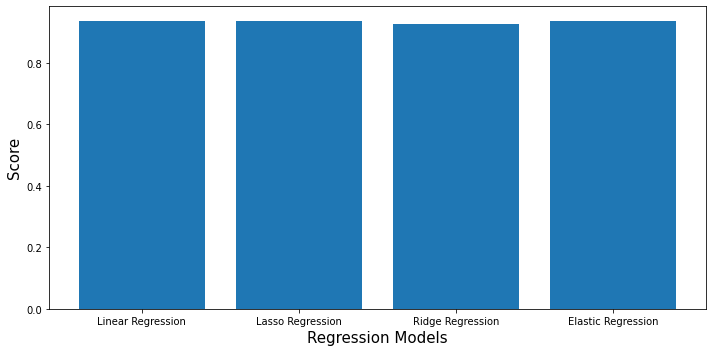

In [26]:
# Plotting the scores
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Elastic Regression']
scores = [regressor.score(X_test, y_test),
   lassoReg.score(X_test, y_test),
   ridgeReg.score(X_test, y_test),
   ENreg.score(X_test, y_test)]

plt.figure(figsize=(10,5))
plt.bar(models, scores)
plt.xlabel('Regression Models', fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.tight_layout()
plt.show()

As we can see while analyzing their performance together, all the models have shown almost equal performance. The intuition of showing their working all together to demonstrate how to use them when fitting a regression model. We can use all these regularization techniques and check which one works well and helps in achieving a better performance. Of course, the elastic net regression will work best because it combines the power of both lasso and ridge regression.

